In [1]:
from connection import MySQLConnection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


new_connection = MySQLConnection()

Connection successfull and records already exist.


Text(0, 0.5, 'AVERAGE SCORE')

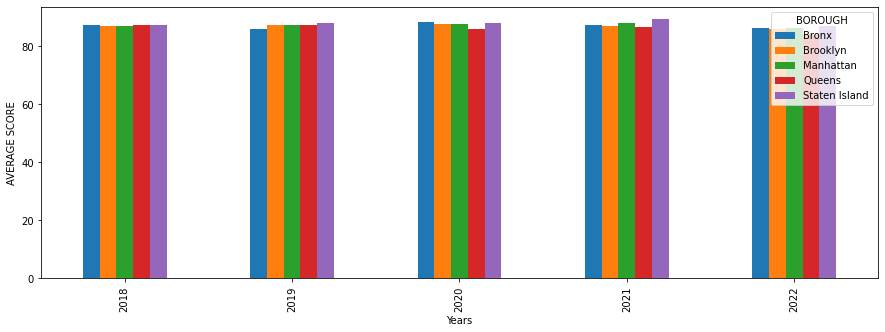

In [2]:
# 
# SQL query o
q = ('''SELECT year(INSPECTION_DATE) AS `YEAR`,BORO AS BOROUGH, AVG(WEIGHED_SCORE) AS `AVERAGE SCORE`, COUNT(SCORE) AS `NUMBER OF INSPECTIONS`
FROM nyc_restaurants.clean_data
GROUP BY BOROUGH, `YEAR`''')

# Convert the SQL query to Pandas DataFrame
r = pd.read_sql(q,  new_connection.con)
df_pivot = pd.pivot_table(
    r,
    values="AVERAGE SCORE",
    index="YEAR",
    columns="BOROUGH",
    aggfunc=np.mean
)
# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(15,5)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("AVERAGE SCORE")


In [3]:
r
m = r.groupby('YEAR')['AVERAGE SCORE'].transform('max') == r['AVERAGE SCORE']
print(r[m])

    YEAR        BOROUGH  AVERAGE SCORE  NUMBER OF INSPECTIONS
2   2020          Bronx        88.2602                   1295
20  2018  Staten Island        87.3273                    938
21  2019  Staten Island        88.0759                   1818
23  2021  Staten Island        89.1714                    426
24  2022  Staten Island        87.0656                    701


Text(0, 0.5, 'AVERAGE SCORE')

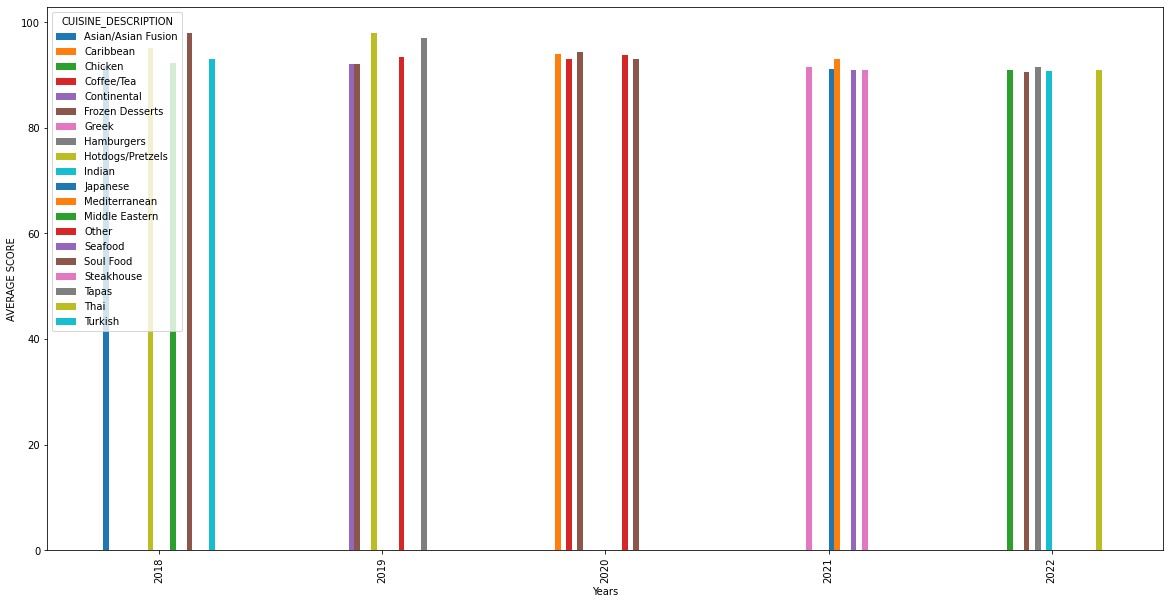

In [8]:
# 
# SQL query o
q1 = ('''SELECT a.* FROM ( SELECT year(INSPECTION_DATE) AS `YEAR`, CUISINE_DESCRIPTION, AVG(WEIGHED_SCORE) AS `AVERAGE SCORE`, COUNT(SCORE) AS `NUMBER OF INSPECTIONS`, RANK() OVER ( PARTITION BY `YEAR` ORDER BY `AVERAGE SCORE` DESC ) score_rank FROM nyc_restaurants.clean_data WHERE BORO = 'Staten Island' GROUP BY `YEAR`, CUISINE_DESCRIPTION ) AS a WHERE a.score_rank <= 5 ORDER BY a.`YEAR` ASC, a.score_rank ASC;''')

# Convert the SQL query to Pandas DataFrame
r1 = pd.read_sql(q1,  new_connection.con)
df_pivot = pd.pivot_table(
    r1,
    values="AVERAGE SCORE",
    index="YEAR",
    columns="CUISINE_DESCRIPTION",
    aggfunc=np.mean
)
# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(20,10)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("AVERAGE SCORE")


In [11]:
r1
m = r1.groupby('YEAR')['AVERAGE SCORE'].transform('max') == r1['AVERAGE SCORE']
print(r1[m])

    YEAR CUISINE_DESCRIPTION  AVERAGE SCORE  NUMBER OF INSPECTIONS  score_rank
0   2018           Soul Food        98.0000                      2           1
5   2019    Hotdogs/Pretzels        98.0000                      1           1
10  2020     Frozen Desserts        94.2857                      7           1
15  2021       Mediterranean        93.0000                      1           1
20  2022          Hamburgers        91.4000                     15           1


In [ ]:
SELECT a.*
 FROM ( 
	SELECT year(INSPECTION_DATE) AS `YEAR`, 
		CUISINE_DESCRIPTION, 
		AVG(WEIGHED_SCORE) AS `AVERAGE SCORE`, 
		COUNT(SCORE) AS `NUMBER OF INSPECTIONS`, 
		CAMIS,
		DBA,
		RANK() OVER ( 
			PARTITION BY `YEAR` ORDER BY `AVERAGE SCORE` DESC ) score_rank
	FROM nyc_restaurants.clean_data 
	WHERE BORO = 'Staten Island' AND CUISINE_DESCRIPTION = 'Hamburgers'
	GROUP BY `YEAR`, DBA
) AS a 
ORDER BY a.`YEAR` ASC, a.score_rank ASC